# [LEGALST 123] Project --- Does distance from university affect number of stops in a given census tract in Berkeley, CA?

Project Group: Emily Chan, KC Harris, Peter Zhang

In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import KFold
import seaborn as sns

---

## Introduction


<b>Why is this important?</b> 

<b>hypothesis</b> 

--- 

## TO DO LIST 

-collect census tract median income data into the notebook 

-household income earnings, official poverty measure

-relationship between distance from university and all stops

-education score 

---

## Getting the Data

In [2]:
pwd

'/Users/chankemily/Documents/GitHub/Legal123-Proj'

In [3]:
berkeley_data_2015_to_2020 = pd.read_csv('/Users/chankemily/Documents/GitHub/Legal123-Proj/data/Berkeley PD Stop Data 2015 to 2020.csv')
berkeley_data_2015_to_2020.head(5)

,CreateDatetime,IncidentNumber,Address,City,Lat,Lon,CallType,Race,Gender,Age,Reason,Enforcement,Car Search
0,03/24/2015 07:10:06 AM,2015-00017130,1775 SAN PABLO AVE,BERKELEY,37.871890,-122.292715,1194,Black,Male,>40,Reas. Susp.,Citation,No Search
1,03/14/2018 04:25:55 PM,2018-00015116,ANTHONY ST / 7TH ST,BERKELEY,37.852226,-122.291495,T,White,Female,30-39,Traffic,Citation,No Search
2,11/06/2016 07:15:42 AM,2016-00065741,RUSSELL ST / MABEL ST,BERKELEY,37.854113,-122.284193,1196,White,Male,>40,Investigation,Warning,No Search
3,03/06/2015 12:02:43 AM,2015-00013345,UNIVERSITY AVE / 7TH ST,BERKELEY,37.868202,-122.296625,1194,White,Male,>40,Reas. Susp.,Warning,Search
4,11/02/2017 11:16:24 PM,2017-00066848,NaN,NaN,37.860996,-122.256144,1194,White,Male,>40,Reas. Susp.,Warning,Search


In [4]:
berkeley_data_2020_to_present = pd.read_csv('/Users/chankemily/Documents/GitHub/Legal123-Proj/data/Berkeley PD Stop Data 2020 to Present.csv')
berkeley_data_2020_to_present.head(5)

,LEA Record ID,Person Number,Date of Stop,Time of Stop,Duration of Stop,Is Stop Made in Response to Call for Service,Information Based Stop,Type Of Stop,Officer Type of Assignment,Location,...,Type of Property Seized,Contraband or Evidence,Other Contraband Desc,Warning Offense Codes,Citation Offense Codes,Result of Stop,In field cite and release Offense Codes,Custodial arrest Offense Codes,LAT,LONG
0,BPD000021033,1,10/01/2020,11:14,8,False,NaN,Vehicle,"Patrol, traffic enforcement, field operations",2900 block of Shattuck Ave,...,NaN,None,NaN,NaN,VC 23123(A) USE CELLPH W/DRIV W/O HFD (I) | VC...,Citation for infraction,NaN,NaN,37.855313,-122.266571
1,BPD000021032,2,10/01/2020,09:40,15,True,NaN,Pedestrian,"Patrol, traffic enforcement, field operations",3000 block of San Pablo Ave,...,NaN,None,NaN,PC 602 TRESPASSING (M),NaN,Warning (verbal or written),NaN,NaN,37.851856,-122.286553
2,BPD000021035,1,10/01/2020,14:32,60,True,NaN,Pedestrian,"Patrol, traffic enforcement, field operations",2000 block of 10th St,...,NaN,Suspected stolen property|Ammunition|Drug para...,NaN,NaN,NaN,Custodial arrest without warrant,NaN,PC 484 THEFT (M) | VC 10852 TAMPER WITH VEHICL...,37.868619,-122.293213
3,BPD000021034,1,10/01/2020,15:07,7,True,NaN,Pedestrian,"Patrol, traffic enforcement, field operations",2600 block of Durant Ave,...,NaN,Weapon(s) other than a firearm,NaN,AA 65002 LOCAL ORDINANCE VIOL (I),NaN,Warning (verbal or written),NaN,NaN,37.868025,-122.256493
4,BPD000021029,1,10/01/2020,10:15,5,False,NaN,Vehicle,"Patrol, traffic enforcement, field operations",College and Ashby,...,NaN,None,NaN,NaN,VC 22450(A) FAIL STOP VEH:XWALK/ETC (I),Citation for infraction,NaN,NaN,37.857030,-122.253055


<b>merged data</b> 

In [5]:
merged_data = pd.read_csv('/Users/chankemily/Documents/GitHub/Legal123-Proj/Project/All_Stops_UPDATED.csv')
merged_data.dropna(axis = 1)
merged_data.head()

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,9,14,17,18,19,20,21,22,23,24,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,LEA Record ID,Incident Number,Date of Stop,Time of Stop,Duration of Stop,City,LAT,LONG,Race Perceived Prior To Stop,...,Contraband or Evidence,Other Contraband Desc,Warning Offense Codes,Citation Offense Codes,In field cite and release Offense Codes,Custodial arrest Offense Codes,IncidentNumber,Address,CallType,Car Search
0,0,BPD000021033,NaN,2020-10-01,11:14,8.0,Berkeley,37.855313,-122.266571,True,...,None,NaN,NaN,VC 23123(A) USE CELLPH W/DRIV W/O HFD (I) | VC...,NaN,NaN,NaN,NaN,NaN,NaN
1,1,BPD000021032,NaN,2020-10-01,09:40,15.0,Berkeley,37.851856,-122.286553,False,...,None,NaN,PC 602 TRESPASSING (M),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,BPD000021035,NaN,2020-10-01,14:32,60.0,Berkeley,37.868619,-122.293213,True,...,Suspected stolen property|Ammunition|Drug para...,NaN,NaN,NaN,NaN,PC 484 THEFT (M) | VC 10852 TAMPER WITH VEHICL...,NaN,NaN,NaN,NaN
3,3,BPD000021034,NaN,2020-10-01,15:07,7.0,Berkeley,37.868025,-122.256493,True,...,Weapon(s) other than a firearm,NaN,AA 65002 LOCAL ORDINANCE VIOL (I),NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,BPD000021029,NaN,2020-10-01,10:15,5.0,Berkeley,37.857030,-122.253055,True,...,None,NaN,NaN,VC 22450(A) FAIL STOP VEH:XWALK/ETC (I),NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
census_data = pd.read_csv('/Users/chankemily/Documents/GitHub/Legal123-Proj/data/CENSUS INCOME DATA BERKELEY 2020.csv')
census_data

,Label (Grouping),Total,"Total!!Less than $10,000","Total!!$10,000 to $14,999","Total!!$15,000 to $24,999","Total!!$25,000 to $34,999","Total!!$35,000 to $49,999","Total!!$50,000 to $74,999","Total!!$75,000 to $99,999","Total!!$100,000 to $149,999","Total!!$150,000 to $199,999","Total!!$200,000 or more",Median income (dollars),Mean income (dollars),PERCENT ALLOCATED,PERCENT ALLOCATED!!Household income in the past 12 months,PERCENT ALLOCATED!!Family income in the past 12 months,PERCENT ALLOCATED!!Nonfamily income in the past 12 months
0,"Census Tract 4211, Alameda County, California",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Households,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Estimate,845,0.6%,0.0%,0.7%,3.3%,3.7%,9.3%,3.9%,12.2%,13.5%,52.8%,"206,199","224,642",NaN,22.7%,(X),(X)
3,Margin of Error,±82,±0.8,±4.6,±1.1,±2.1,±3.6,±3.7,±2.8,±4.1,±4.9,±7.8,"±12,656","±18,376",NaN,(X),(X),(X)
4,Families,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Estimate,256,0.0%,0.0%,0.0%,2.3%,6.3%,14.8%,19.5%,13.3%,14.5%,29.3%,"129,375",N,NaN,(X),(X),(X)
425,Margin of Error,±76,±14.4,±14.4,±14.4,±3.4,±8.9,±10.2,±17.6,±9.3,±9.5,±14.4,"±57,860",N,NaN,(X),(X),(X)
426,Nonfamily households,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427,Estimate,395,11.4%,8.6%,11.4%,6.3%,11.1%,9.6%,11.9%,15.4%,8.1%,6.1%,"50,938","76,779",NaN,(X),(X),26.1%


---

## Exploratory Data Analysis

In [7]:
berkeley_data_2020_to_present.columns

Index(['LEA Record ID', 'Person Number', 'Date of Stop', 'Time of Stop',
       'Duration of Stop', 'Is Stop Made in Response to Call for Service',
       'Information Based Stop', 'Type Of Stop', 'Officer Type of Assignment',
       'Location', 'City', 'Is Location a K12 Public School',
       'If K12 School Is Stop of a Student', 'School Name',
       'Education Code Section', 'Education Code Subdivision',
       'Race Perceived Prior To Stop', 'Perceived Race or Ethnicity',
       'Perceived Gender', 'Perceived Gender Nonconforming', 'Is LGBT',
       'Perceived Age', 'Person had Limited or No English Fluency',
       'Perceived or Known Disability', 'City of Residence', 'Reason for Stop',
       'Reason for Stop Narrative', 'Traffic Violation Type',
       'Traffic Violation Offense Codes', 'Suspicion Offense Code',
       'Suspicion SubType', 'Actions Taken', 'Basis for Search',
       'Basis for Search Narrative', 'Basis for Property Seizure',
       'Type of Property Seized', 'C

In [8]:
merged_data.columns

Index(['Unnamed: 0', 'LEA Record ID', 'Incident Number', 'Date of Stop',
       'Time of Stop', 'Duration of Stop', 'City', 'LAT', 'LONG',
       'Race Perceived Prior To Stop', 'Perceived Race or Ethnicity',
       'Perceived Gender', 'Perceived Age', 'Reason for Stop',
       'Reason for Stop Narrative', 'Result of Stop', 'Person Number',
       'Is Stop Made in Response to Call for Service',
       'Information Based Stop', 'Type Of Stop', 'Officer Type of Assignment',
       'Location', 'Is Location a K12 Public School',
       'If K12 School Is Stop of a Student', 'School Name',
       'Education Code Section', 'Education Code Subdivision',
       'Perceived Gender Nonconforming', 'Is LGBT',
       'Person had Limited or No English Fluency',
       'Perceived or Known Disability', 'City of Residence',
       'Traffic Violation Type', 'Traffic Violation Offense Codes',
       'Suspicion Offense Code', 'Suspicion SubType', 'Actions Taken',
       'Basis for Search', 'Basis for Searc

In [9]:
string_splice = merged_data["Date of Stop"].str.split("-", n = 2, expand = True).apply(pd.to_numeric)
merged_data["Month"] = string_splice[1]
merged_data["Year"] = string_splice[0]
merged_data

,Unnamed: 0,LEA Record ID,Incident Number,Date of Stop,Time of Stop,Duration of Stop,City,LAT,LONG,Race Perceived Prior To Stop,...,Warning Offense Codes,Citation Offense Codes,In field cite and release Offense Codes,Custodial arrest Offense Codes,IncidentNumber,Address,CallType,Car Search,Month,Year
0,0,BPD000021033,NaN,2020-10-01,11:14,8.0,Berkeley,37.855313,-122.266571,True,...,NaN,VC 23123(A) USE CELLPH W/DRIV W/O HFD (I) | VC...,NaN,NaN,NaN,NaN,NaN,NaN,10,2020
1,1,BPD000021032,NaN,2020-10-01,09:40,15.0,Berkeley,37.851856,-122.286553,False,...,PC 602 TRESPASSING (M),NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2020
2,2,BPD000021035,NaN,2020-10-01,14:32,60.0,Berkeley,37.868619,-122.293213,True,...,NaN,NaN,NaN,PC 484 THEFT (M) | VC 10852 TAMPER WITH VEHICL...,NaN,NaN,NaN,NaN,10,2020
3,3,BPD000021034,NaN,2020-10-01,15:07,7.0,Berkeley,37.868025,-122.256493,True,...,AA 65002 LOCAL ORDINANCE VIOL (I),NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2020
4,4,BPD000021029,NaN,2020-10-01,10:15,5.0,Berkeley,37.857030,-122.253055,True,...,NaN,VC 22450(A) FAIL STOP VEH:XWALK/ETC (I),NaN,NaN,NaN,NaN,NaN,NaN,10,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67399,58946,NaN,NaN,2016-01-08,23:20:13,NaN,BERKELEY,37.868738,-122.287303,NaN,...,NaN,NaN,NaN,NaN,2016-00001528,BONAR ST / ADDISON ST,T,Search,1,2016
67400,58947,NaN,NaN,2018-01-24,21:21:17,NaN,OAKLAND,37.847302,-122.282235,NaN,...,NaN,NaN,NaN,NaN,2018-00004897,ALCATRAZ AVE / ESSEX ST,T,No Search,1,2018
67401,58948,NaN,NaN,2015-03-19,13:41:33,NaN,BERKELEY,37.864475,-122.258202,NaN,...,NaN,NaN,NaN,NaN,2015-00016131,2531 TELEGRAPH AVE,1194,No Search,3,2015
67402,58949,NaN,NaN,2020-01-17,09:34:46,NaN,BERKELEY,37.874196,-122.273295,NaN,...,NaN,NaN,NaN,NaN,2020-00003015,DELAWARE ST / MARTIN LUTHER KING JR WAY,T,No Search,1,2020


In [10]:
select_features = merged_data[["Month", "Year","Perceived Gender", "Perceived Race or Ethnicity", "Traffic Violation Offense Codes", "Location", "Race Perceived Prior To Stop", "Perceived Age", "School Name", "Education Code Section", "Education Code Subdivision", "Type Of Stop", "Result of Stop", "Time of Stop", "Is Location a K12 Public School"]]
select_features

,Month,Year,Perceived Gender,Perceived Race or Ethnicity,Traffic Violation Offense Codes,Location,Race Perceived Prior To Stop,Perceived Age,School Name,Education Code Section,Education Code Subdivision,Type Of Stop,Result of Stop,Time of Stop,Is Location a K12 Public School
0,10,2020,Male,Hispanic/Latino,VC 23123(A) USE CELLPH W/DRIV W/O HFD (I),2900 block of Shattuck Ave,True,30,NaN,NaN,NaN,Vehicle,Citation for infraction,11:14,False
1,10,2020,Female,White,NaN,3000 block of San Pablo Ave,False,40,NaN,NaN,NaN,Pedestrian,Warning (verbal or written),09:40,False
2,10,2020,Male,Black/African American,NaN,2000 block of 10th St,True,35,NaN,NaN,NaN,Pedestrian,Custodial arrest without warrant,14:32,False
3,10,2020,Male,White,NaN,2600 block of Durant Ave,True,50,NaN,NaN,NaN,Pedestrian,Warning (verbal or written),15:07,False
4,10,2020,Male,White,VC 22450(A) FAIL STOP VEH:XWALK/ETC (I),College and Ashby,True,60,NaN,NaN,NaN,Vehicle,Citation for infraction,10:15,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67399,1,2016,Male,Black,NaN,NaN,NaN,18-29,NaN,NaN,NaN,NaN,Warning,23:20:13,NaN
67400,1,2018,Female,Black,NaN,NaN,NaN,>40,NaN,NaN,NaN,NaN,Warning,21:21:17,NaN
67401,3,2015,Male,White,NaN,NaN,NaN,30-39,NaN,NaN,NaN,NaN,Warning,13:41:33,NaN
67402,1,2020,Female,Black,NaN,NaN,NaN,>40,NaN,NaN,NaN,NaN,Warning,09:34:46,NaN


In [11]:
location_k12_school = select_features["Is Location a K12 Public School"].dropna().value_counts()
location_k12_school

False    8437
True       16
Name: Is Location a K12 Public School, dtype: int64

In [12]:
education_code = select_features["Education Code Subdivision"].dropna()
education_code.value_counts()

Series([], Name: Education Code Subdivision, dtype: int64)

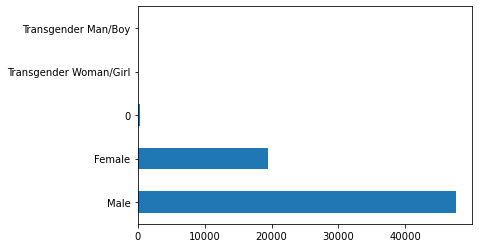

In [13]:
perceived_gender = select_features["Perceived Gender"].value_counts().dropna(axis = 0)
perceived_gender.plot.barh("Perceived Gender");

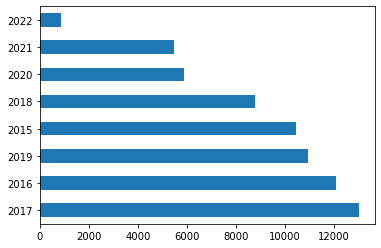

In [14]:
year = select_features["Year"].value_counts()
year.plot.barh("Year");

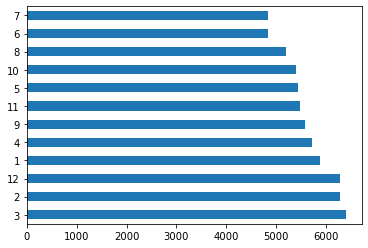

In [15]:
month = select_features["Month"].value_counts()
month.plot.barh("Month");

In [16]:
#traffic_violation = merged_data["Traffic Violation Offense Codes"].str.split(" ", n = 2, expand = True)
#select_features["Traffic Violation Code"] = traffic_violation[1]
#select_features

In [19]:
traffic_violation_code = select_features["Traffic Violation Offense Codes"].value_counts()
traffic_violation_code_cleaned = traffic_violation_code[traffic_violation_code > 50]
traffic_violation_code_cleaned

VC 22450(A) FAIL STOP VEH:XWALK/ETC (I)        550
VC 22350 UNSAFE SPEED:PREVAIL COND (I)         416
VC 21453(A) FAIL STOP LINE/ETC AT RED (I)      414
VC 23123(A) USE CELLPH W/DRIV W/O HFD (I)      341
VC 5200(A) DISPLAY LIC PLATES WRONG (I)        329
VC 23123.5(A) NO HND HLD DEVICE W/DRIVE (I)    264
VC 24250 DRIVE WITHOUT LIGHTS:DARK (I)         200
VC 21461(A) DRIVER FAIL OBEY SIGN/ETC (I)      152
VC 21950(A) FAIL YIELD TO PED:XWALKS (I)       152
VC 4000(A) NO REG:VEH/TRAILER/ETC (I)          121
VC 22107 UNSAF TURN &/OR NO SIGNAL (I)         114
VC 27315 SEATBELT VIOLATION (I)                 97
VC 24400 HEADLAMP:OPR/AMT/SIZE:VIO (I)          93
VC 24600 TAILLAMP VIOLATIONS (I)                63
VC 5202 LICENSE PLATE DISPLAY VIO (I)           58
VC 22101(D) FAIL TO OBEY TURN SIGNS (I)         56
Name: Traffic Violation Offense Codes, dtype: int64

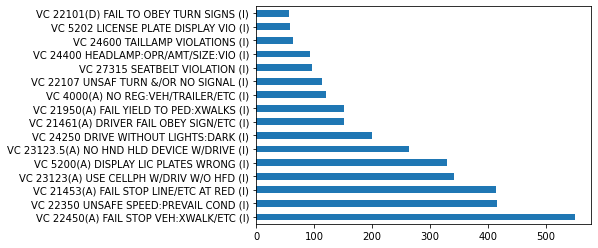

In [20]:
traffic_violation_code_cleaned.plot.barh();

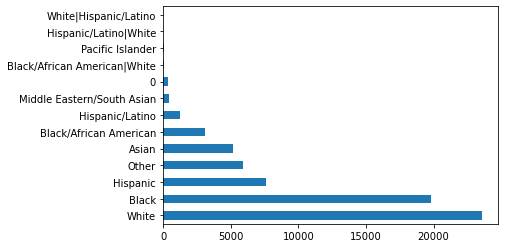

In [21]:
race = select_features["Perceived Race or Ethnicity"].value_counts()
cleaned_data_race = race[race > 8]
cleaned_data_race.plot.barh("Perceived Race or Ethnicity");

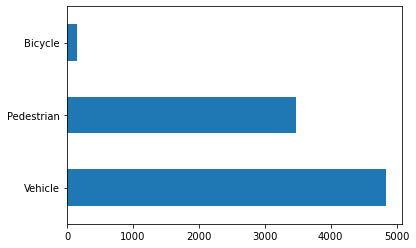

In [22]:
type_of_stop = select_features["Type Of Stop"].value_counts()
type_of_stop.plot.barh("Type Of Stop");

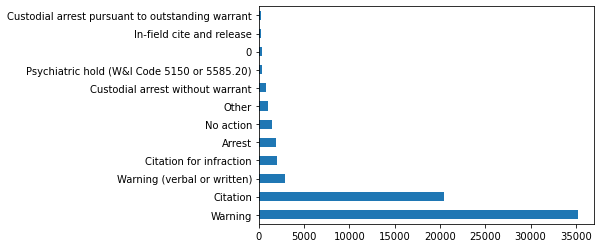

In [23]:
result_of_stop = select_features["Result of Stop"].value_counts()
cleaned_result_stop = result_of_stop[result_of_stop > 150]
cleaned_result_stop.plot.barh();

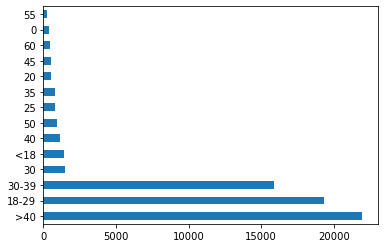

In [24]:
age = select_features["Perceived Age"].value_counts()
cleaned_age = age[age > 150]
cleaned_age.plot.barh();

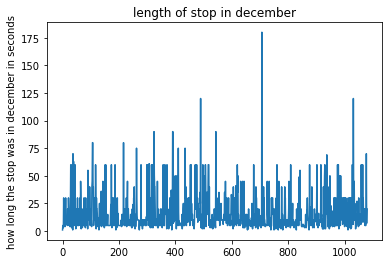

In [25]:
duration = merged_data[merged_data['Month'] == 12]
plt.plot(duration['Duration of Stop'].values)
plt.ylabel('how long the stop was in december in seconds')
plt.title('length of stop in december');

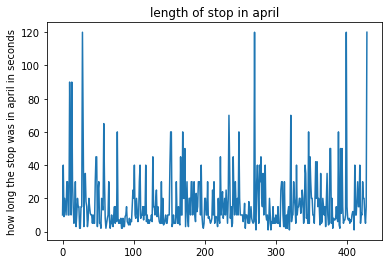

In [26]:
duration = merged_data[merged_data['Month'] == 4]
plt.plot(duration['Duration of Stop'].values)
plt.ylabel('how long the stop was in april in seconds')
plt.title('length of stop in april');

In [67]:
census_data

,Label (Grouping),Total,"Total!!Less than $10,000","Total!!$10,000 to $14,999","Total!!$15,000 to $24,999","Total!!$25,000 to $34,999","Total!!$35,000 to $49,999","Total!!$50,000 to $74,999","Total!!$75,000 to $99,999","Total!!$100,000 to $149,999","Total!!$150,000 to $199,999","Total!!$200,000 or more",Median income (dollars),Mean income (dollars),PERCENT ALLOCATED,PERCENT ALLOCATED!!Household income in the past 12 months,PERCENT ALLOCATED!!Family income in the past 12 months,PERCENT ALLOCATED!!Nonfamily income in the past 12 months
0,"Census Tract 4211, Alameda County, California",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Households,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Estimate,845,0.6%,0.0%,0.7%,3.3%,3.7%,9.3%,3.9%,12.2%,13.5%,52.8%,"206,199","224,642",NaN,22.7%,(X),(X)
3,Margin of Error,±82,±0.8,±4.6,±1.1,±2.1,±3.6,±3.7,±2.8,±4.1,±4.9,±7.8,"±12,656","±18,376",NaN,(X),(X),(X)
4,Families,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Estimate,256,0.0%,0.0%,0.0%,2.3%,6.3%,14.8%,19.5%,13.3%,14.5%,29.3%,"129,375",N,NaN,(X),(X),(X)
425,Margin of Error,±76,±14.4,±14.4,±14.4,±3.4,±8.9,±10.2,±17.6,±9.3,±9.5,±14.4,"±57,860",N,NaN,(X),(X),(X)
426,Nonfamily households,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427,Estimate,395,11.4%,8.6%,11.4%,6.3%,11.1%,9.6%,11.9%,15.4%,8.1%,6.1%,"50,938","76,779",NaN,(X),(X),26.1%


In [68]:
mean_income = census_data['Mean income (dollars)']
mean_income.dropna(inplace = True)
mean_income = pd.DataFrame(data = mean_income).sort_values

In [ ]:
income = census_data.loc[:, ['Mean Income (dollars)', "Median Income (dollars)"]].groupby("Mean Income (dollars)").mean()
income.plot.line(figsize=(15, 4))

In [28]:
!pip install geopy

In [ ]:
# berkeley coordinates 37.8719° N, 122.2585° W

In [ ]:
coordinates = merged_data[["LAT", "LONG"]]

coordinates = coordinates[coordinates.LAT != -361]
coordinates = coordinates[coordinates.LONG != -361 & < 200]

coordinates['LAT'].index.size

In [ ]:
coordinates["LONG"]

In [ ]:
from geopy.distance import geodesic
berkeley = (38.8719, -122.2585)
cleveland_oh = (41.499498, -81.695391)
print(geodesic(berkeley, cleveland_oh).miles)

In [ ]:
coordinates["LONG"][8469]

In [ ]:
from geopy.distance import geodesic
i = 0
distance_list = []
uni_coords = (37.8719,122.2585)

for i in range(coordinates.index.size - 1):
    lat_1 = coordinates['LAT'][i]
    long_1 = (coordinates['LONG'][i])*-1
    stop_coords = (lat_1, long_1)
    distance = (geodesic(stop_coords, uni_coords).miles)
    distance_list.append(distance)

coordinates['Distance from Cal'] = distance_list
coordinates

In [ ]:
len(merged_data)

In [ ]:
len(distance_list)

In [74]:
median_income.dtypes

dtype('O')

In [77]:
census_data['Median income (dollars)']= census_data['Median income (dollars)'].str.replace(',','')

In [100]:
median_income = census_data['Median income (dollars)'].str.replace('+','').str.replace("±", " ")
median_income = pd.DataFrame
median_income

/var/folders/nw/fb_3y6xd65gcvg_4h2slxztr0000gn/T/ipykernel_25485/868163508.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  median_income = census_data['Median income (dollars)'].str.replace('+','').str.replace("±", " ")


pandas.core.frame.DataFrame

In [101]:
incomes = median_income.groupby()

TypeError: groupby() missing 1 required positional argument: 'self'

In [ ]:
!pip install geopandas

In [ ]:
!pip install shapely

In [102]:
import geopandas
from shapely.geometry import Point

In [103]:
berkeley = geopandas.read_file('/Users/chankemily/Documents/GitHub/Legal123-Proj/Project/Census Tract Polygons 2010.geojson')

In [104]:
berkeley['name10'][31]

'4229'

In [105]:
berkeley
stop_point = [Point(merged_data['LONG'][i], merged_data['LAT'][i]) for i in np.arange(len(merged_data))]

In [106]:
tt = [berkeley['geometry'].contains(stop_point[i]) for i in np.arange(len(stop_point))]

In [107]:
judge = [np.where(tt[i] == True)[0] for i in np.arange(len(tt))]

In [108]:
tract_column = [i[0] if i.size > 0  else -1 for i in judge]
merged_data['tract'] = tract_column

<AxesSubplot:xlabel='tract', ylabel='Count'>

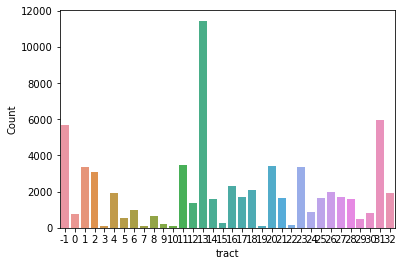

In [109]:
stop_count_per_tract = pd.DataFrame(merged_data.groupby('tract').count()['LAT']).rename(columns = {'LAT':'Count'}).reset_index()
sns.barplot(x = stop_count_per_tract['tract'], y = stop_count_per_tract['Count'])

The explanation for merging stops with census tract:
-for the stops dataset, we first extract the location of each stop with the LAT and LONG coordinates. Then for each stop, we examine if it happened within any census tract as defined by the U.S. Census. Next, we cleared all the stops which do not belong to any of the census tracts (which means they did not happen in Berkeley based on the census definition). Therefore, we now have the updated stops dataset with an added column that specifies which census tract it belongs to.

In [110]:
berkeley['order'] = np.arange(len(berkeley))
merged_data = merged_data.merge(berkeley[['name10', 'order']], left_on = 'tract', right_on = 'order')
merged_data

,Unnamed: 0,LEA Record ID,Incident Number,Date of Stop,Time of Stop,Duration of Stop,City,LAT,LONG,Race Perceived Prior To Stop,...,Custodial arrest Offense Codes,IncidentNumber,Address,CallType,Car Search,Month,Year,tract,name10,order
0,0,BPD000021033,NaN,2020-10-01,11:14,8.0,Berkeley,37.855313,-122.266571,True,...,NaN,NaN,NaN,NaN,NaN,10,2020,11,4235,11
1,41,BPD000021062,NaN,2020-10-02,15:21,7.0,Berkeley,37.854378,-122.271169,True,...,NaN,NaN,NaN,NaN,NaN,10,2020,11,4235,11
2,52,BPD000021048,NaN,2020-10-02,05:04,10.0,Berkeley,37.859469,-122.266941,False,...,NaN,NaN,NaN,NaN,NaN,10,2020,11,4235,11
3,63,BPD000021083,NaN,2020-10-03,18:57,23.0,Berkeley,37.855689,-122.269154,True,...,NaN,NaN,NaN,NaN,NaN,10,2020,11,4235,11
4,65,BPD000021126,NaN,2020-10-03,19:56,30.0,Berkeley,37.857611,-122.267249,True,...,PC 459 BURGLARY (F),NaN,NaN,NaN,NaN,10,2020,11,4235,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61697,57550,NaN,NaN,2019-10-07,17:15:07,NaN,BERKELEY,37.895487,-122.279191,NaN,...,NaN,2019-00056876,SAN LORENZO AVE / THE ALAMEDA,T,No Search,10,2019,9,4212,9
61698,57746,NaN,NaN,2019-10-07,17:20:54,NaN,BERKELEY,37.895487,-122.279191,NaN,...,NaN,2019-00056879,SAN LORENZO AVE / THE ALAMEDA,T,No Search,10,2019,9,4212,9
61699,57886,NaN,NaN,2019-10-23,08:46:47,NaN,BERKELEY,37.890938,-122.271137,NaN,...,NaN,2019-00060130,SHATTUCK AVE / MARIN AVE,T,No Search,10,2019,9,4212,9
61700,58537,NaN,NaN,2019-09-25,13:59:59,NaN,BERKELEY,37.894131,-122.277080,NaN,...,NaN,2019-00054251,THE ALAMEDA / SAN PEDRO AVE,T,No Search,9,2019,9,4212,9
